## **Compiler Construction Lab Exercises**

# **Group Members (ICS 4C):**
1. 121289 - Atonya Whitney A. Madafali
2. 121472 - Kimani, Vicky Nightingale
3. 114439 - Laura Ayushi Ochieng'
4. 120357 - Bettyrose Waithera
5. 121720 - Mutungi Vincent Mugambi


# **Lab 1 : Flex, Bison, Lex, Yacc**



# **Flex**
Fast lexical analyzer generator - It is a tool for generating programs that perform pattern-matching on text. There are many applications for Flex, including writing compilers in conjunction with GNU Bison. Flex is a free implementation of the well known Lex program. It features a Lex compatibility mode, and also provides several new features such as exclusive start conditions (“Flex,” 2022).

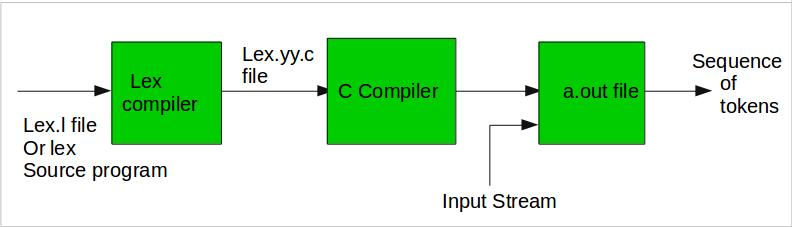

In [ ]:
/* Declaring two counters one for number of lines other for number of characters */

%{
int no_of_lines = 0;
int no_of_chars = 0;
%}

/***rule 1 counts the number of lines,rule 2 counts the number of characters
and rule 3 specifies when to stop taking input***/
%%
\n	 ++no_of_lines;
.	 ++no_of_chars;
end	 return 0;
%%

/*** User code section***/
int yywrap(){}
int main(int argc, char **argv)
{

yylex();
printf("number of lines = %d, number of chars = %d\n",
	no_of_lines, no_of_chars );

return 0;
}


# **Bison**
Bison is a general-purpose parser generator that converts a grammar description (Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar. The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start symbol (Gao, 2007).

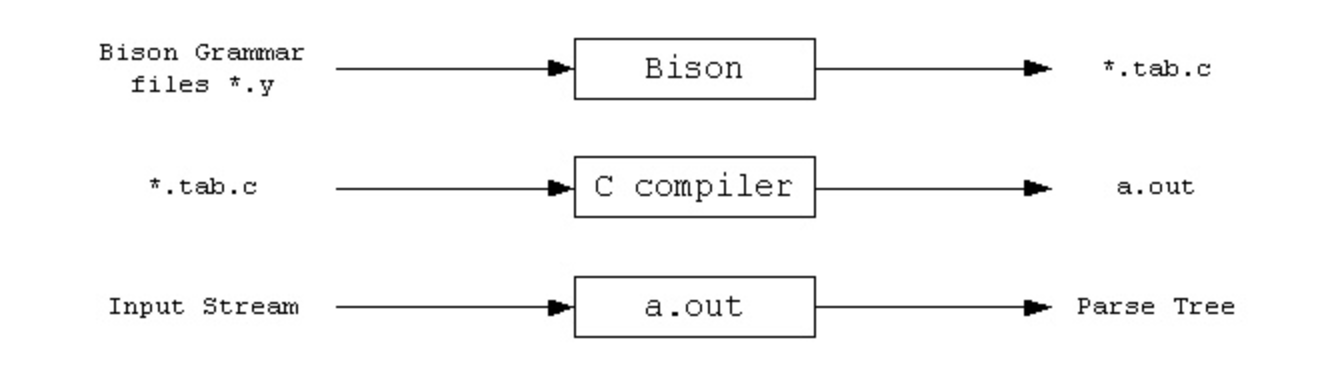

Steps to use Bison:


*   Write a lexical analyzer to process input and pass tokens to the parser.
*   Write the grammar specification for bison, including grammar rules, yyparse() and yyerror()


*   Run Bison on the grammar to produce the parser.
*   Compile the code output by Bison, as well as any other source files.


*   Link the object files to produce the finished product.







*Example: bison input file for a simple calculator that recognizes and evaluates binary postfix expressions using a stack.* ***(written in C)***

In [ ]:
%{
    #include <stdio.h>
    #include <assert.h>
  
    static int Pop();
    static int Top();
    static void Push(int val);
%}

%%token T_Int

%%

S : S E '\n' { printf("= %d\n", Top()); }
  |
  ;

E : E E '+' { Push(Pop() + Pop()); }
  | E E '-' { int op2 = Pop(); Push(Pop() - op2); }
  | E E '*' { Push(Pop() * Pop()); }
  | E E '/' { int op2 = Pop(); Push(Pop() / op2); }
  | T_Int   { Push(yylval); }
  ;

%%

static int stack[100], count = 0;

static int Pop() {
    assert(count > 0);
    return stack[--count];
}
static int Top() {
    assert(count > 0);
    return stack[count-1];
}
static void Push(int val) {
    assert(count < sizeOf(stack)/sizeOf(*stack));
    stack[count++] = val;
}

int main() {
    return yyparse();
}

# **Lex**

A computer program that is designed to generate scanners, also known as tokenizers, which recognizes lexical patterns in a text. Lex can be 
used with a parser generator to perform lexical analysis. It is easy, 
for example, to interface Lex and Yacc, an open source program that gene-rates code for the parser. Furthermore, lex programs are normally 
separated into three sections which are separated by a %% delimiter.
The three sections include :definitions, rules and user subroutines.



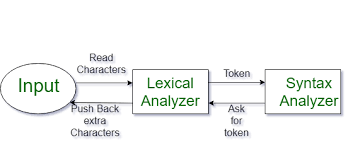

*Example: A lex program*

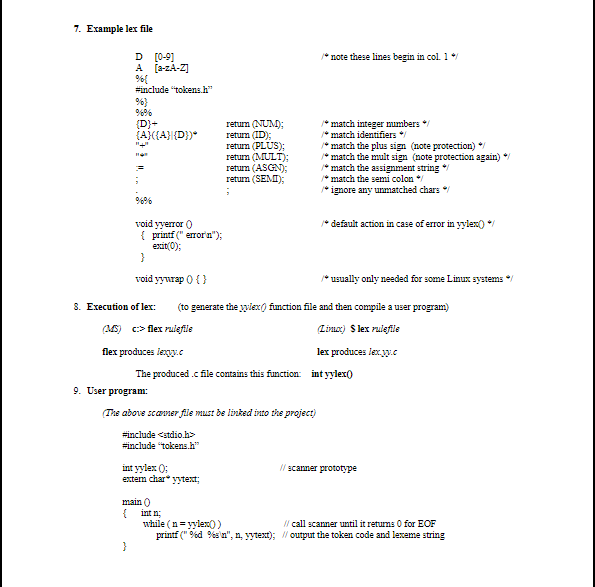

# **Yacc**

YACC stands for Yet Another Compiler Compiler.
It provides a tool to produce a parser for a given grammar.
YACC is designed to compile a LALR (1) grammar.
It is used to produce the source code of the syntactic analyzer of the language produced by LALR (1) grammar.
The input of YACC is the rule or grammar and the output is a C program.

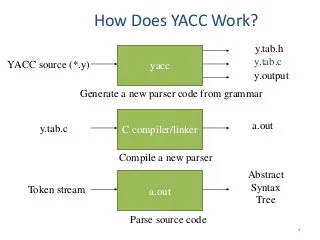

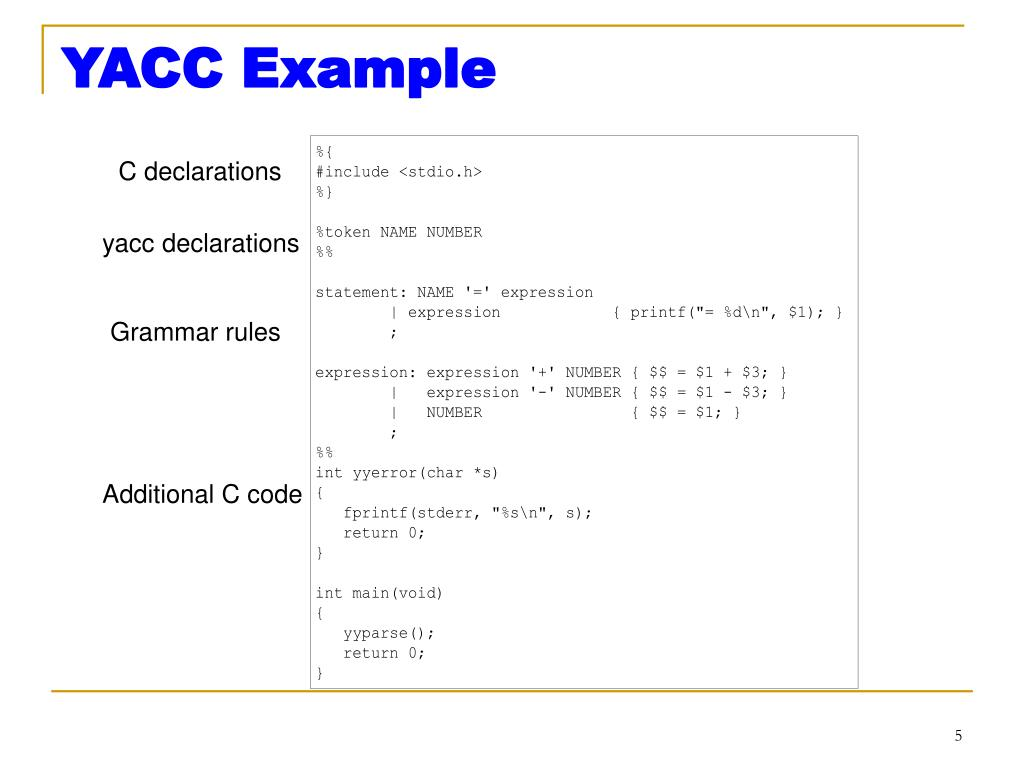

# **Lab Activity 2**


**1.   Conversion of NFA to DFA**





# Example **1**
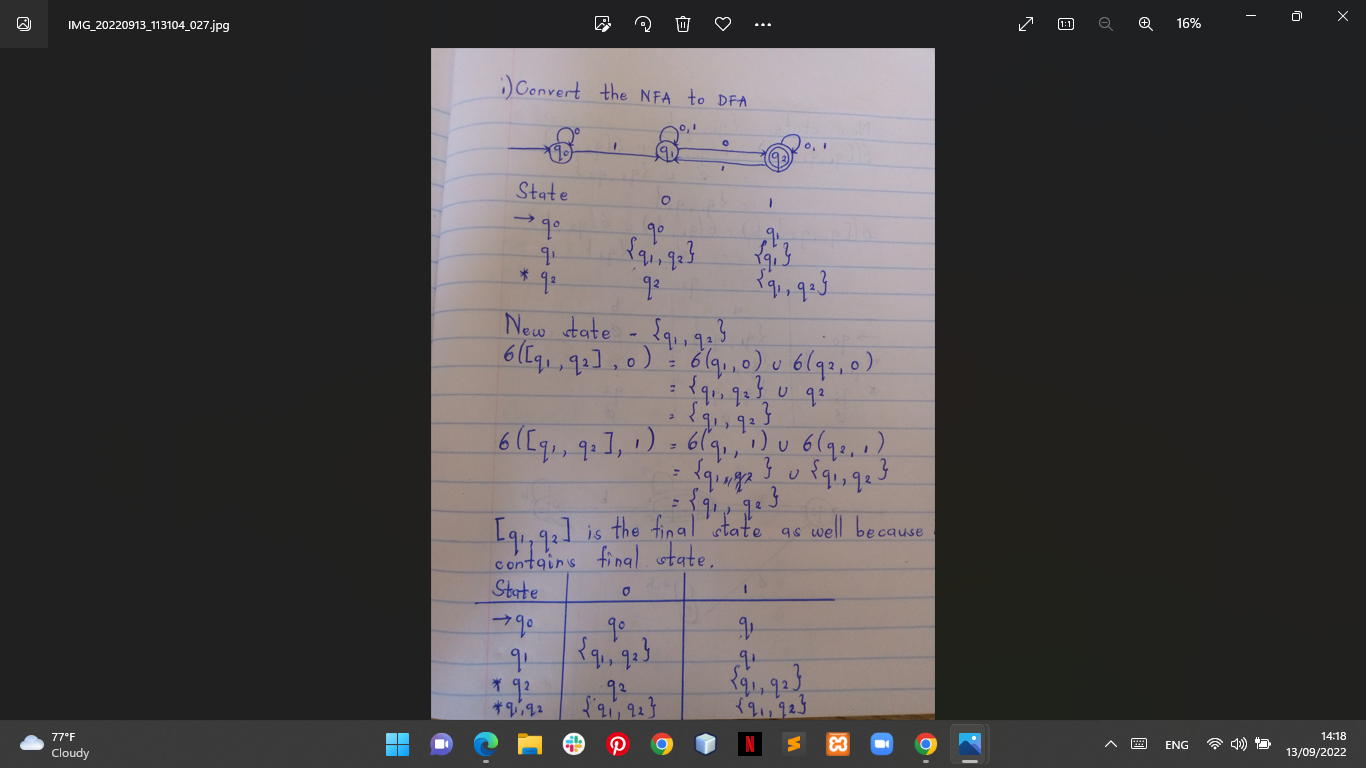

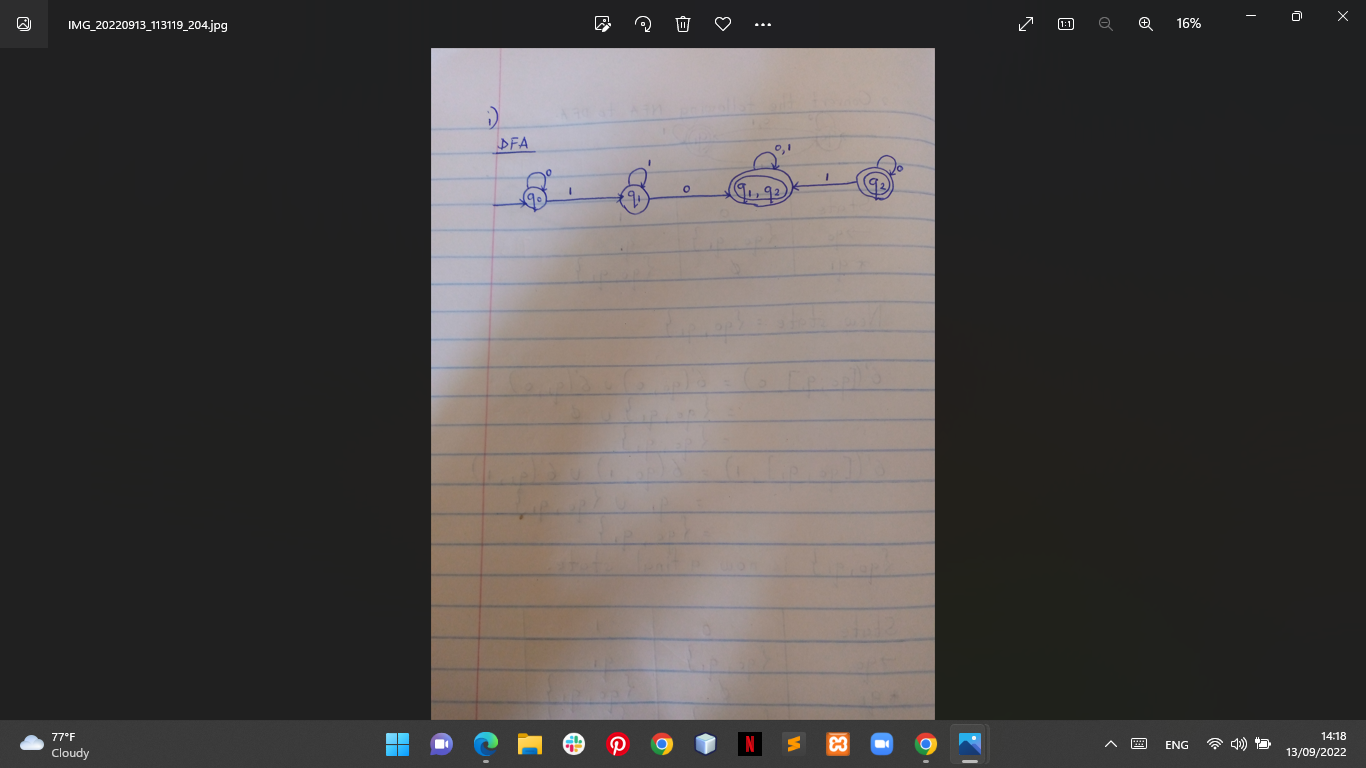

# Example **2**
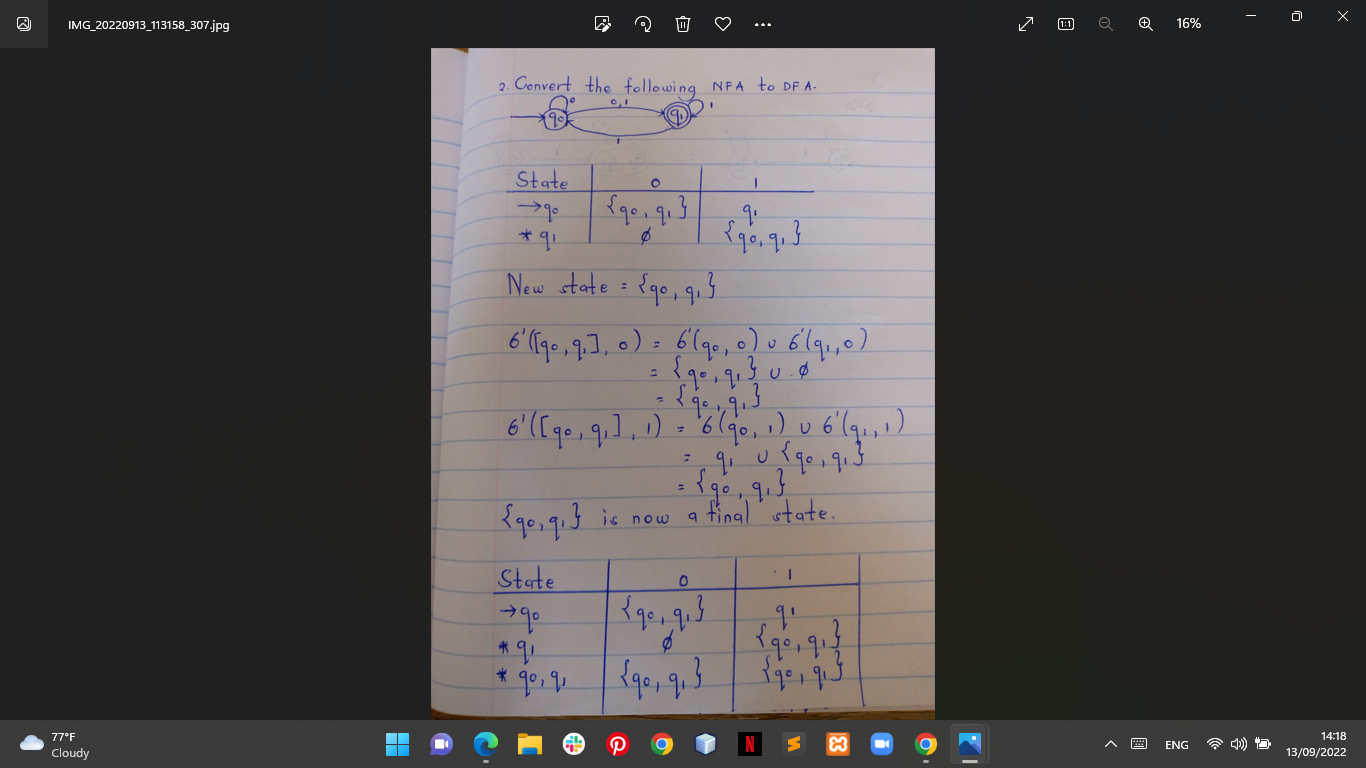


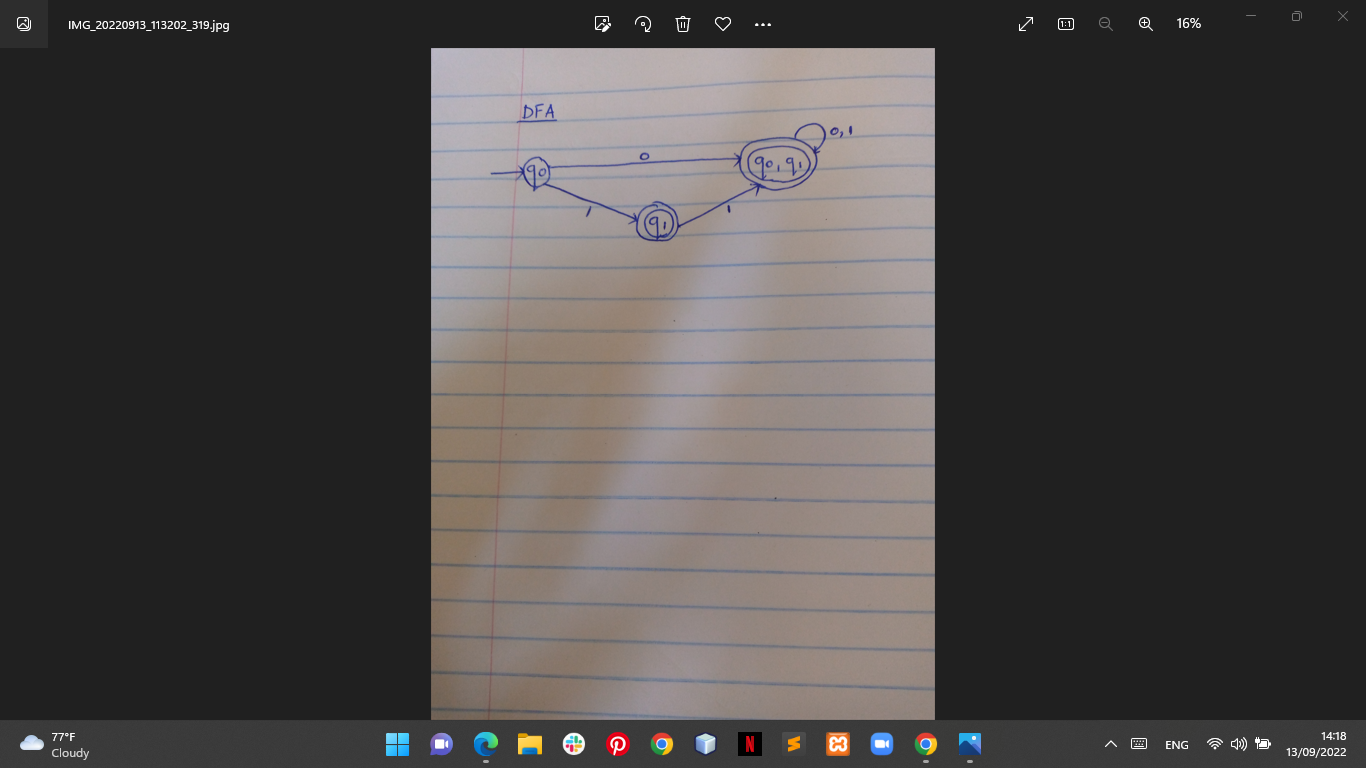

**2. Building a simple lexical analyzer using Flex and Bison**



Flex is a finite state machine-based scanner generating tool for lexical analysis (FSM). A collection of regular expressions is used as the input, and the output code that implements the input rules for the scanner.

***Example: Scanner for a calculator***

In [ ]:
/* this is only for the scanner, parser not included yet* /
%{
    int lineNum = 0;
%}

%%

"("{printf("(\n"); }
")"{printf(")\n"); }
"+"{printf("+\n"); }
"*"{printf("+\n"); }
\n {lineNum++;}
[ \t]+ { }
[0-9]+ {printf("%s\n", yytext);}

%%

int yywrap() {
    return 1;
}

int main () {
    yylex();
    return 0;
}

/* makefile used to build the scanner */
p1: lex.yy.o
  gcc -g -o pl lex.yy.o

lex.yy.o: call.l
  flex call.l; gcc -g -c lex.yy.c

clean:
  rm -f pl *.o lex.yy.c
  : factor '*' tern
    { $$ = $1 * $3; }
  | term
    { $$ = $1; }
  ;

term
  : NUMBER
    { $$ = $1; }
  | '(' exp ')'
    { $$ = $2; }
  ;

%%

int main() {
    yyparse();
    return 0;
}

*To integrate both the scanner and parser, we need to modify the scanner input file and save it again separately.*

In [ ]:
%{
#include <stdlib.h>
#define DEBUG
#define NUMBER 258

typedef union{
    int d;
} YYSTYPE;
YYSTYPE yyval;
extern int lineNum;
%}

%%

[ \t]+ {}
[\n] { lineNum++; }
"(" {
    #ifdef DEBUG
      printf("token '(' at line %d\n", lineNum);
    #endif
      return '(';
}
")" {
    #ifdef DEBUG
      printf("token ')' at line %d\n", lineNum);
    #endif
      return ')';
}

Bison is a pushdown automata-based LALR(1) parser generator tool for syntax analysis (PDA). Context-free grammar (CFG) rules are used as the input, and the output is the code needed to create the parser using those rules.

*Example: implement a parser for calculator (cal.y)*

In [ ]:
%{
#include <stdio.h>
#include <ctype.h>
int lineNum = 1;
void yyerror(char *ps, ...){
    printf("%s\n", ps);
}
%}

%union {
    int d;
}
//choose token type from union above
%token <d> NUMBER
%token '(' ')'
%left '+'
%left '*'
%type <d> exp factor term

%start cal

%%

cal
  : exp
    { printf("The result is %d\n", $1); }
  ;

exp
  : exp '+' factor
    { $$ = $1 +$3; }
  | factor
    { $$ = $1; }
  ;

factor

#ifdef DEBUG
  printf("token '+' at line %d\n", lineNum);
#endif
  return '+';
}
"*"{
#ifdef DEBUG
  printf("token '*' at line %d\n", lineNum);
#endif
  return '*';
}
[0-9]+ {
#ifdef DEBUG
  printf("token %s at line %d\n", yytext, lineNum);
#endif
  yyval.d = atoi(yytext);
  return NUMBER;
}

%%

int yywrap() {
    return 1;
}

*Makefile used to build the scanner and parser:*

In [ ]:
p2: lex.yy.o cal.tab.o
  gcc -o p2 lex.yy.o cal.tab.o

lex.yy.o: cal.l
  flex cal.l; gcc -c lex.yy.c

cal.tab.o: cal.y
  bison -d cal.y; gcc -c cal.tab.c

clean:
  rm -f p2 cal.output *.o cal.tab.c lex.yy.c

***tips to debug Bison:***
1. Run Bison with -v option, then a file cal.output will be generated. It contains all the conflicts and/or never reduced rules, and all the states generated by Bison.
2. To get debug information from Bison: first, add -DYYDEBUG when compiling cal.tab.c; second, set the environment variable YYDEBUG=1. Then it will print some debug information. 

# **REFERENCES**
1. Flex. (2022). Retrieved September 1, 2022, from Sourceforge.net website: http://gnuwin32.sourceforge.net/packages/flex.htm

2. Flex (Fast Lexical Analyzer Generator ) - GeeksforGeeks. (2018, April 12). Retrieved September 2, 2022, from GeeksforGeeks website: https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

3.   Bison Tutorial (Gao, Lan). Retrieved September, 3, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html



4.   GNU Bison. (2014, 08, 06) Retrieved September, 3, 2022, from https://www.gnu.org/software/bison/



5.   GNU Bison - The Yacc-compatible Parser Generator (Septemeber 11, 2021) - Retrieved September, 3, 2022, from https://www.gnu.org/software/bison/manual/


6.   Introduction to bison (July 9, 2012) by ***Johnson, Maggie*** Retrieved September 3, 2022 from https://web.stanford.edu/class/archive/cs/cs143/cs143.1128/handouts/120%20Introducing%20bison.pdf

7.   Lex Syntax and Example. (2016, February 9). Retrieved September 5, 2022, from studylib.net website: https://studylib.net/doc/7866290/lex-syntax-and-example‌

8. YACC - javatpoint. (2021). Retrieved September 5, 2022, from www.javatpoint.com website: https://www.javatpoint.com/yacc


9. Flex and Bison Tutorial (Wang Ming-Hwa, Ph.D) COEN 259 Compilers, Department of Computing Engineering, Santa Clara University - Retrieved September 19 2022 from https://www.cse.scu.edu/~m1wang/compiler/TutorialFlexBison.pdf

‌











‌